<a href="https://colab.research.google.com/github/mukeshsharma1981/ML-Projects/blob/main/Principle_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
dataset = pd.read_csv("/content/iris.csv")


In [4]:
print(dataset.head())


   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [5]:
print(dataset.shape)


(150, 5)


In [7]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
print(dataset.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [9]:
# Converting Categorical features into Numerical features
converter = LabelEncoder()
dataset['Species'] = converter.fit_transform(dataset['Species'].astype(str))
print(dataset.head())
print(dataset.info())

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [10]:
# Dividing dataset into label and feature sets
X = dataset.drop('Species', axis = 1) # Features
Y = dataset['Species'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 4)
(150,)


In [11]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)


In [12]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))


Variance explained by each of the n_components:  [0.72770452 0.23030523]
Total variance explained by the n_components:  0.9580097536148197


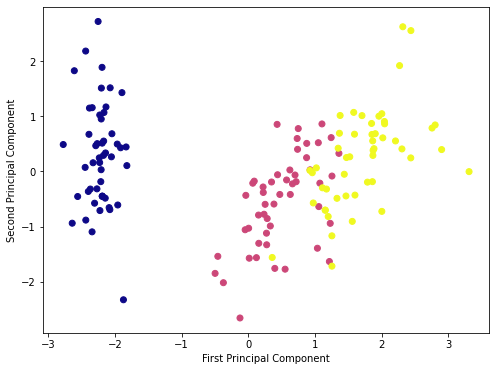

In [13]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
